<a href="https://colab.research.google.com/github/sharikavallambatla/Movie_data_analysis/blob/master/DA_Shark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  !unzip "/content/drive/My Drive/archive.zip" -d "/content/drive/My Drive/"

Archive:  /content/drive/My Drive/archive.zip
  inflating: /content/drive/My Drive/genome_scores.csv  
  inflating: /content/drive/My Drive/genome_tags.csv  
  inflating: /content/drive/My Drive/link.csv  
  inflating: /content/drive/My Drive/movie.csv  
  inflating: /content/drive/My Drive/rating.csv  
  inflating: /content/drive/My Drive/tag.csv  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
movies = pd.read_csv('/content/drive/My Drive/movie.csv', sep=',')


In [ ]:
import pandas as pd

In [ ]:
tags = pd.read_csv('/content/drive/My Drive/tag.csv', sep=',')

In [ ]:
ratings = pd.read_csv('/content/drive/My Drive/rating.csv', sep=',', parse_dates=['timestamp'])

In [ ]:
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
tags=tags.dropna()

In [ ]:
(tags.isnull()).sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [ ]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [ ]:
(movies.isnull())

,movieId,title,genres
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
27273,False,False,False
27274,False,False,False
27275,False,False,False
27276,False,False,False


In [ ]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
tags.isna().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [ ]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
ratings['rating'].mean()

3.5255285642993797

In [ ]:
ratings['rating'].min()

0.5

In [ ]:
ratings['rating'].max()

5.0

In [ ]:
seriesObj = ratings.apply(lambda x: True if x['rating'] > 2.5 else False , axis=1)

In [ ]:
numOfRows = len(seriesObj[seriesObj == True].index)

In [ ]:
numOfRows


16486759

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [ ]:
20000263-16486759

3513504

In [ ]:
import matplotlib.pyplot as plt


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca98b5c940>]],
      dtype=object)

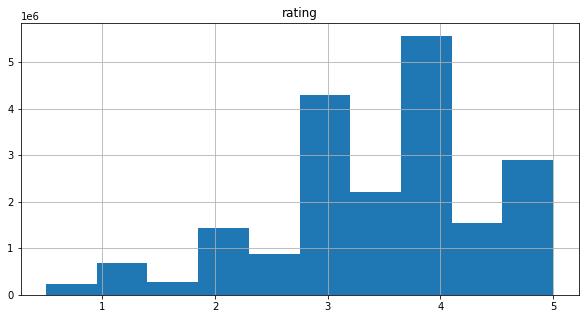

In [ ]:
%matplotlib inline

ratings.hist(column='rating', figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca8e81d160>]],
      dtype=object)

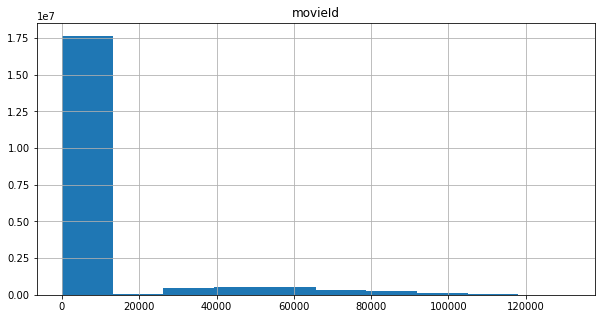

In [ ]:

ratings.hist(column='movieId', figsize=(10,5))

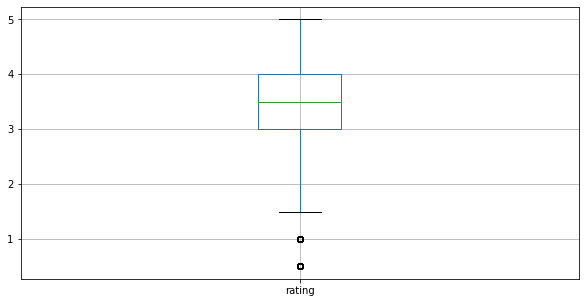

In [ ]:
ratings.boxplot(column='rating', figsize=(10,5))

In [ ]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count


,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating


,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592
...,...
131254,4.000000
131256,4.000000
131258,2.500000


In [ ]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161
...,...
131254,1
131256,1
131258,1


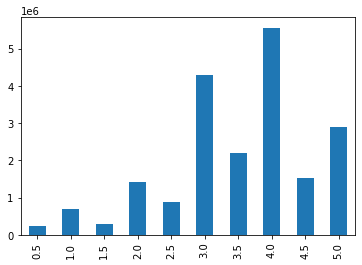

In [ ]:

ratings['rating'].value_counts().sort_index().plot.bar()

In [ ]:
tag_counts = tags['tag'].value_counts()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, fla

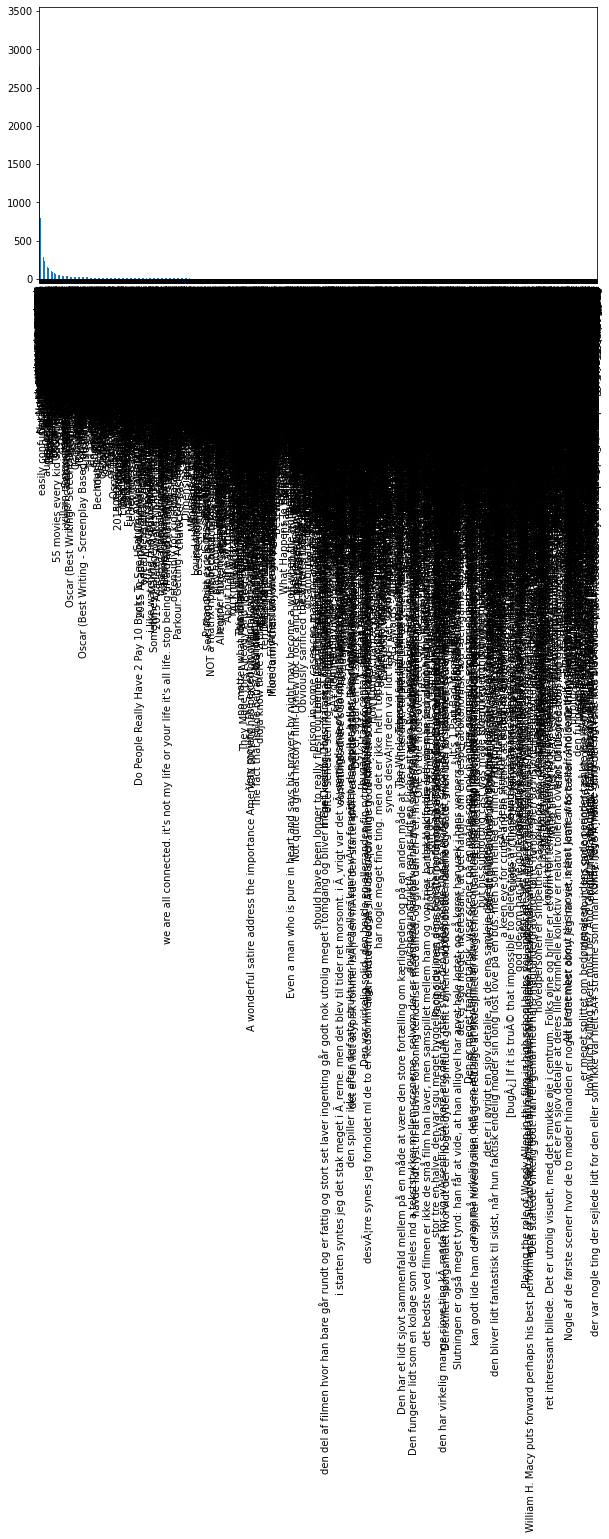

In [ ]:
tag_counts.plot(kind='bar', figsize=(10,5))

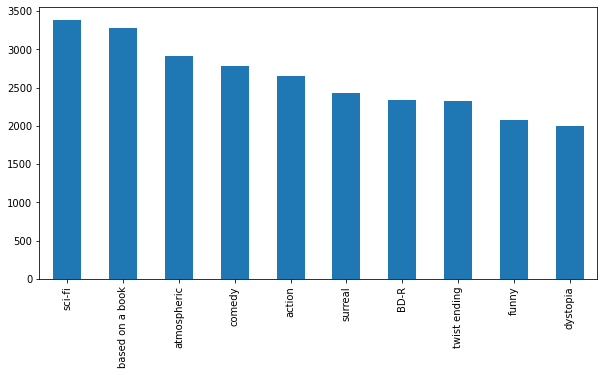

In [ ]:
tag_counts[:10].plot(kind='bar', figsize=(10,5))

In [ ]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'])

In [ ]:
tags['year']=1
def makeYearCol(tags):
  for i in range(len(tags['timestamp'])):
    y = tags['timestamp'][i].strip()[:3]
    try:
      if int(y):
       tags['timestamp'][i] = tags['timestamp'][i][0:3]
       tags['timestamp'][i] = int(y)
      else:
       tags['timestamp'][i] = 0
    except:
      tags['timestamp'][i] = "check"

In [ ]:
makeYearCol(tags)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


KeyError: ignored

In [ ]:
tags

In [ ]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,2005-12-24 13:00:10,2005-12-24 13:00:10
333927,100371,1732,coen brothers,2005-12-24 13:00:36,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,2005-12-24 13:00:48,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,2005-12-24 13:02:51,2005-12-24 13:02:51
333939,100371,5004,peter sellers,2005-12-24 13:03:19,2005-12-24 13:03:19
333921,100371,47,brad pitt,2005-12-24 13:03:32,2005-12-24 13:03:32
333922,100371,47,morgan freeman,2005-12-24 13:03:32,2005-12-24 13:03:32
333937,100371,4011,guy ritchie,2005-12-24 13:03:51,2005-12-24 13:03:51
333936,100371,4011,brad pitt,2005-12-24 13:03:51,2005-12-24 13:03:51
333920,100371,32,bruce willis,2005-12-24 13:04:02,2005-12-24 13:04:02


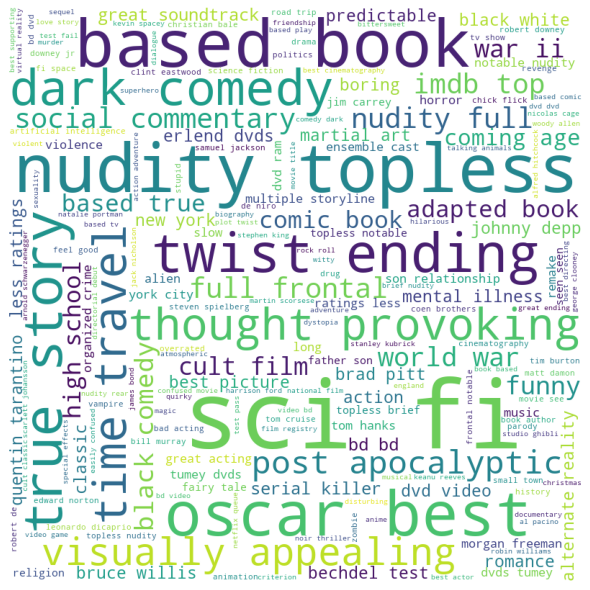

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
df = tags
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in tags.tag: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
no_of_movies_year = list(tags.groupby(['year']).size())
years = list(sorted(set(tags['year'])))
# print(len(years) == len(no_of_movies_year))

plt.figure(figsize=(10,7))
plt.plot(years,no_of_movies_year)
plt.xticks(fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("No of movies in that year",fontsize=20)
plt.title("Movies released per year")
plt.show()